## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Visualizing Data using Matplotlib

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_can.shape

(195, 38)

In [ ]:
years = list(map(str, range(1980, 2014)))
years

### Pie Charts

In [6]:
# Gather data
df_continents = df_can.groupby("Continent", axis=0).sum()
df_continents.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_18268\3669126068.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby("Continent", axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


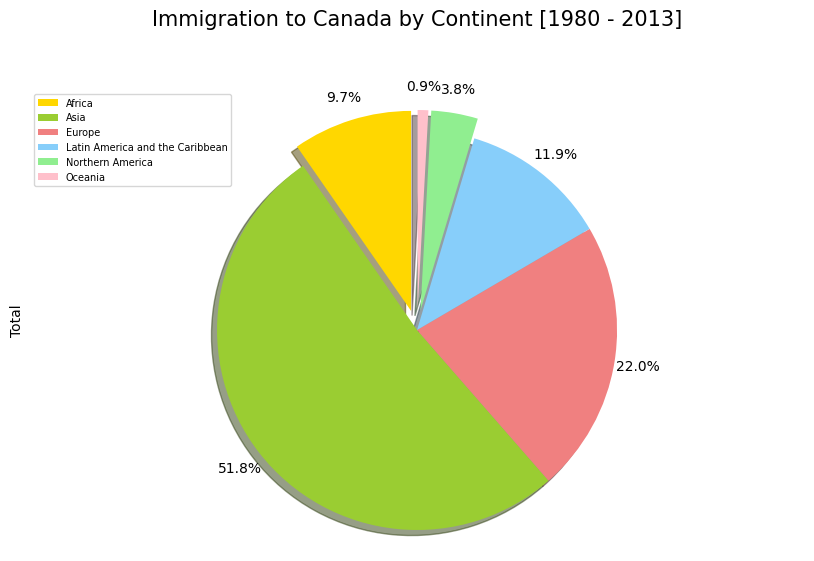

In [17]:
colors_list = [
    "gold",
    "yellowgreen",
    "lightcoral",
    "lightskyblue",
    "lightgreen",
    "pink",
]
explode_list = [
    0.1,
    0,
    0,
    0,
    0.1,
    0.1,
]  # ratio for each continent with which to offset each wedge.

df_continents["Total"].plot(
    kind="pie",
    figsize=(10, 6),
    autopct="%1.1f%%",  # add in percentages
    startangle=90,
    shadow=True,
    labels=None,
    pctdistance=1.12,
    colors=colors_list,
    explode=explode_list,
)
plt.title("Immigration to Canada by Continent [1980 - 2013]", y=1.12, fontsize=15)
plt.axis("equal")  # set the pie chart to look like a cirle
plt.legend(labels=df_continents.index, loc="upper left", fontsize=7)
plt.show()

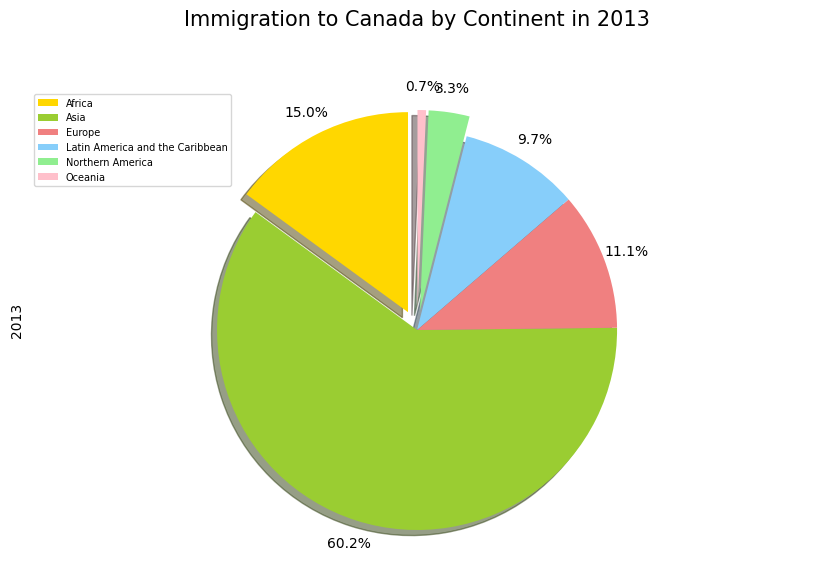

In [26]:
# Explore the proportion of new immigrants grouped by continents in 2013
df_continents["2013"].plot(
    kind="pie",
    figsize=(10, 6),
    autopct="%1.1f%%",  # add in percentages
    startangle=90,
    shadow=True,
    labels=None,
    pctdistance=1.12,
    colors=colors_list,
    explode=explode_list,
)
plt.title("Immigration to Canada by Continent in 2013", y=1.12, fontsize=15)
plt.axis("equal")  # set the pie chart to look like a cirle
plt.legend(labels=df_continents.index, loc="upper left", fontsize=7)
plt.show()

### Box Plots

In [27]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


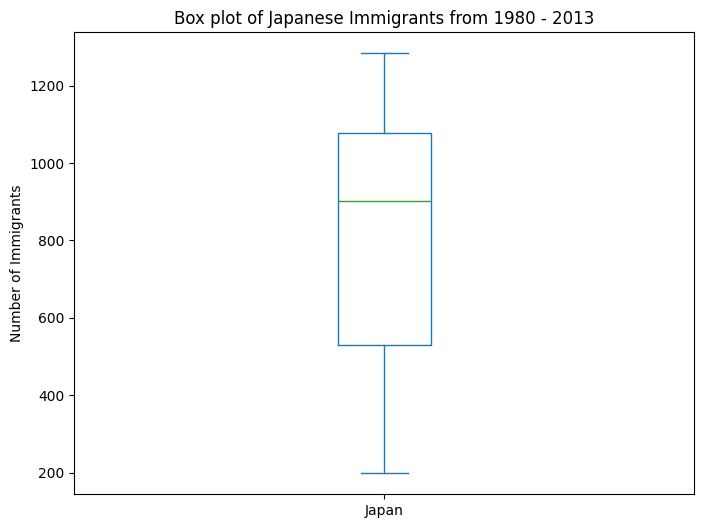

In [28]:
df_japan.plot(kind="box", figsize=(8, 6))
plt.title("Box plot of Japanese Immigrants from 1980 - 2013")
plt.ylabel("Number of Immigrants")
plt.show()

#### Comment

- The minimum number of immigrants is around 200, maximum number is around 1300, median number of immigrants is around 900
- 25% of the years for period 1980-2013 had an annual immigrant count of ~500 or fewer
- 75% of the years for period 1980-2013 had an annual immigrant count of ~1100 or fewer

In [30]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [33]:
# compare the distribution of number of new immigrants from India and China from 1980-2013
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [34]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


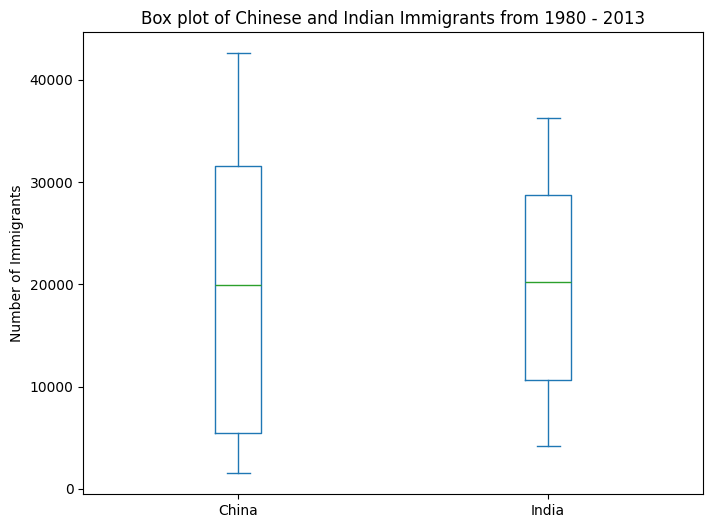

In [36]:
df_CI.plot(kind="box", figsize=(8, 6))
plt.title("Box plot of Chinese and Indian Immigrants from 1980 - 2013")
plt.ylabel("Number of Immigrants")
plt.show()

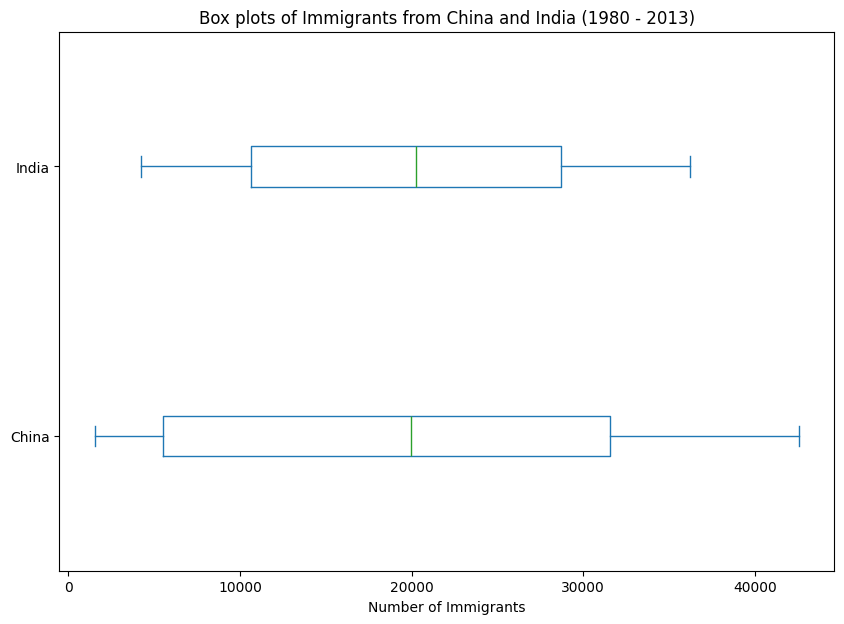

In [38]:
# horizontal box plots
df_CI.plot(kind="box", figsize=(10, 7), vert=False)

plt.title("Box plots of Immigrants from China and India (1980 - 2013)")
plt.xlabel("Number of Immigrants")

plt.show()

#### Subplots

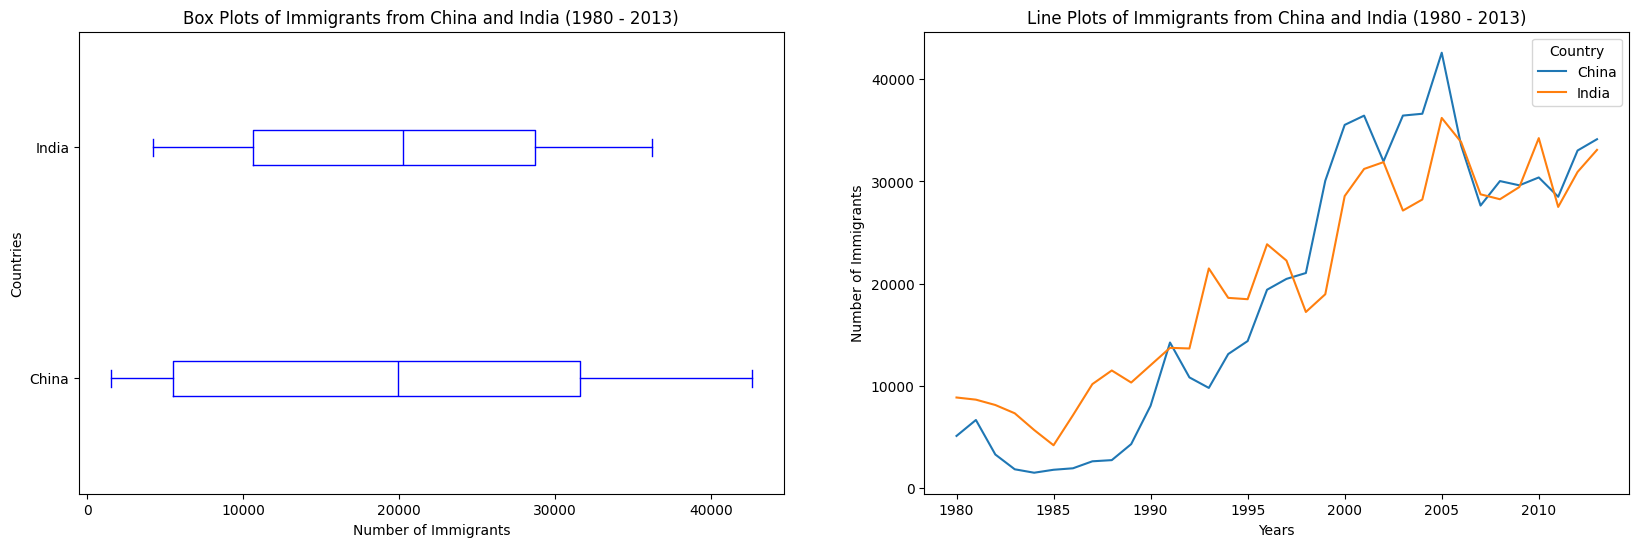

In [39]:
fig = plt.figure()  # create figure

ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1r, 2c, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1r, 2c, second plot)

# subplot 1: box plot
df_CI.plot(
    kind="box", color="blue", vert=False, figsize=(20, 6), ax=ax0
)  # add to subplot 1
ax0.set_title("Box Plots of Immigrants from China and India (1980 - 2013)")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

# subplot 2: line plot
df_CI.plot(kind="line", figsize=(20, 6), ax=ax1)
ax1.set_title("Line Plots of Immigrants from China and India (1980 - 2013)")
ax1.set_ylabel("Number of Immigrants")
ax1.set_xlabel("Years")

plt.show()

#### Create a box plot to visualize the distribution of the top 15 countries grouped by decades 1980s, 1990s, 2000s

In [40]:
# get the dataset
df_top15 = df_can.sort_values(by='Total', ascending=False)
df_top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [52]:
# create a new df which contains the aggregate for each decade
print(years)
df_1980s = df_can[years[:10]].sum(axis=1)
df_1980s.head()

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


Country
Afghanistan       3693
Albania              9
Algeria           1271
American Samoa       3
Andorra              2
dtype: int64

In [53]:
df_1990s = df_can[years[10:20]].sum(axis=1)
df_1990s.head()

Country
Afghanistan       15845
Albania            2568
Algeria           13153
American Samoa        2
Andorra               6
dtype: int64

In [54]:
df_2000s = df_can[years[20:]].sum(axis=1)
df_2000s.head()

Country
Afghanistan       39101
Albania           13122
Algeria           55015
American Samoa        1
Andorra               7
dtype: int64

In [55]:
new_df = pd.DataFrame({'1980s': df_1980s, '1990s': df_1990s, '2000s': df_2000s})
new_df.head()

,1980s,1990s,2000s
Country,,,
Afghanistan,3693,15845,39101
Albania,9,2568,13122
Algeria,1271,13153,55015
American Samoa,3,2,1
Andorra,2,6,7


In [56]:
new_df.describe()

,1980s,1990s,2000s
count,195.000000,195.000000,195.000000
mean,5422.938462,10021.492308,17423.020513
std,17099.940917,29129.244091,53674.301829
min,0.000000,0.000000,1.000000
25%,10.000000,196.500000,462.500000
50%,240.000000,1051.000000,2909.000000
75%,3321.500000,6577.500000,12068.500000
max,179171.000000,261966.000000,466431.000000


Text(23.999999999999986, 0.5, 'Countries')

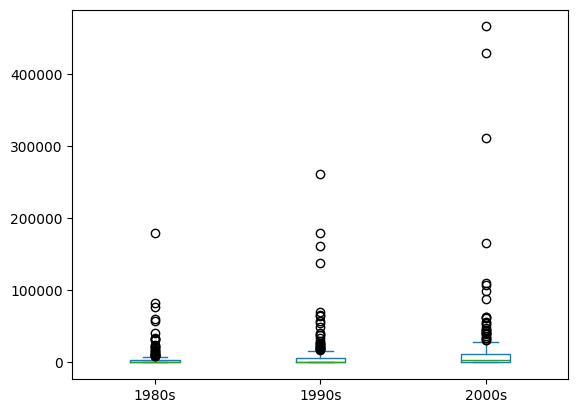

In [57]:
new_df.plot(kind='box')
ax0.set_title("Box Plots of Immigrants in three decades 1980s, 1990s and 2000s")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")


### Scatter Plots

In [60]:
# get data
df_total = df_can[years].sum(axis=0).to_frame()

# change the years to type int
df_total.index = map(int, df_total.index)

# reset index
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ["year", "total"]

df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


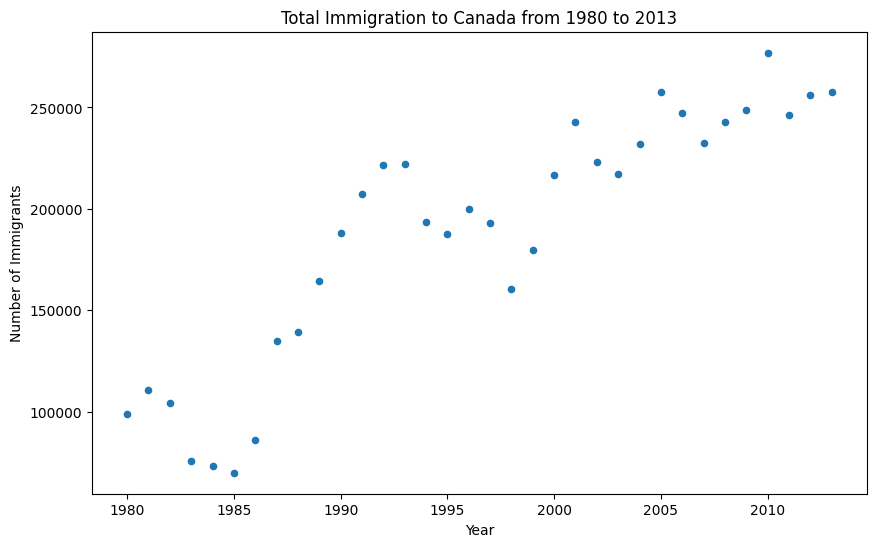

In [61]:
# plot data
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6))
plt.title("Total Immigration to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.show()

In [62]:
# plot a linear line of best fit
x = df_total['year']
y = df_total['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

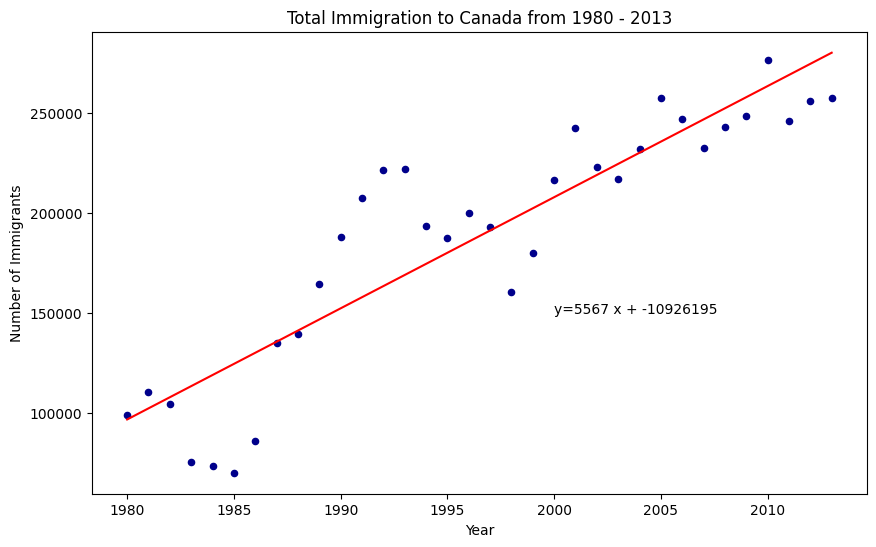

'No. Immigrants = 5567 * Year + -10926195'

In [64]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")

plt.title("Total Immigration to Canada from 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color="red")  # recall that x is the Years
plt.annotate("y={0:.0f} x + {1:.0f}".format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
"No. Immigrants = {0:.0f} * Year + {1:.0f}".format(fit[0], fit[1])

In [65]:
import seaborn as sns

c:\Users\admin\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='year', ylabel='total'>

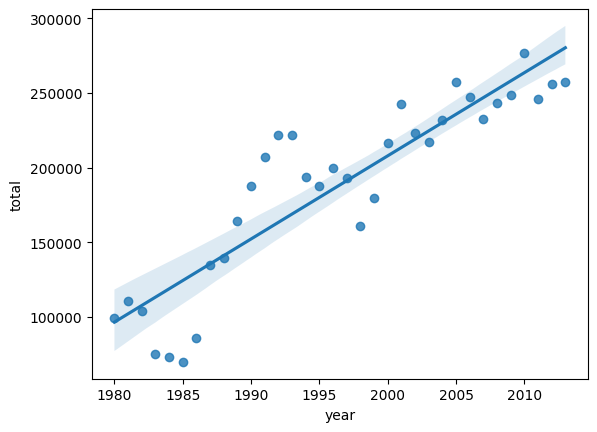

In [66]:
sns.regplot(x='year', y='total', data=df_total)

#### Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013

In [71]:
# get the data
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_total = pd.DataFrame(df_countries.sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


<Axes: xlabel='year', ylabel='total'>

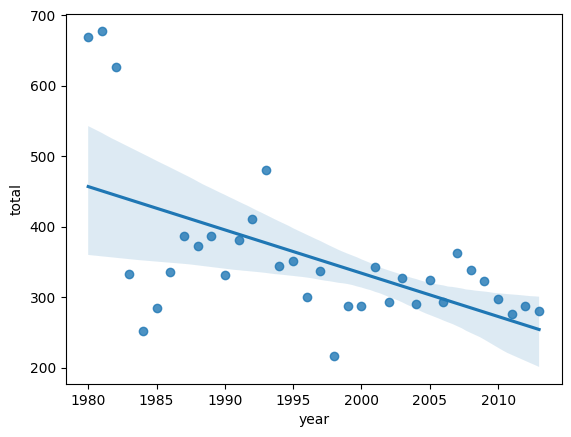

In [72]:
sns.regplot(x='year', y='total', data=df_total)

### Bubble Plots

#### Analyzing the effect of Argentina's great depression

In [74]:
# get the data for Brazil and Argentina
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [75]:
# create the normalized weights
# normalize Brazil data
norm_brazil = (df_can_t["Brazil"] - df_can_t["Brazil"].min()) / (
    df_can_t["Brazil"].max() - df_can_t["Brazil"].min()
)

# normalize Argentina data
norm_argentina = (df_can_t["Argentina"] - df_can_t["Argentina"].min()) / (
    df_can_t["Argentina"].max() - df_can_t["Argentina"].min()
)

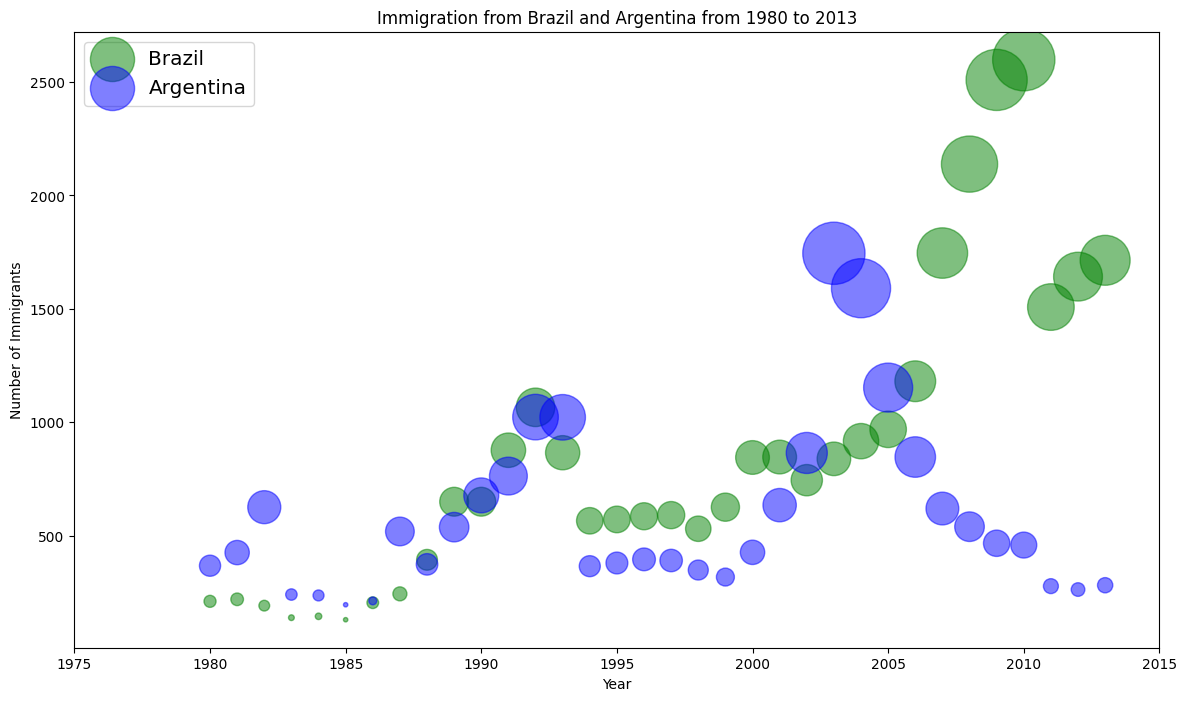

In [76]:
# plot the data
# Brazil
ax0 = df_can_t.plot(
    kind="scatter",
    x="Year",
    y="Brazil",
    figsize=(14, 8),
    alpha=0.5,  # transparency
    color="green",
    s=norm_brazil * 2000 + 10,  # pass in weights
    xlim=(1975, 2015),
)

# Argentina
ax1 = df_can_t.plot(
    kind="scatter",
    x="Year",
    y="Argentina",
    alpha=0.5,
    color="blue",
    s=norm_argentina * 2000 + 10,
    ax=ax0,
)

ax0.set_ylabel("Number of Immigrants")
ax0.set_title("Immigration from Brazil and Argentina from 1980 to 2013")
ax0.legend(["Brazil", "Argentina"], loc="upper left", fontsize="x-large")

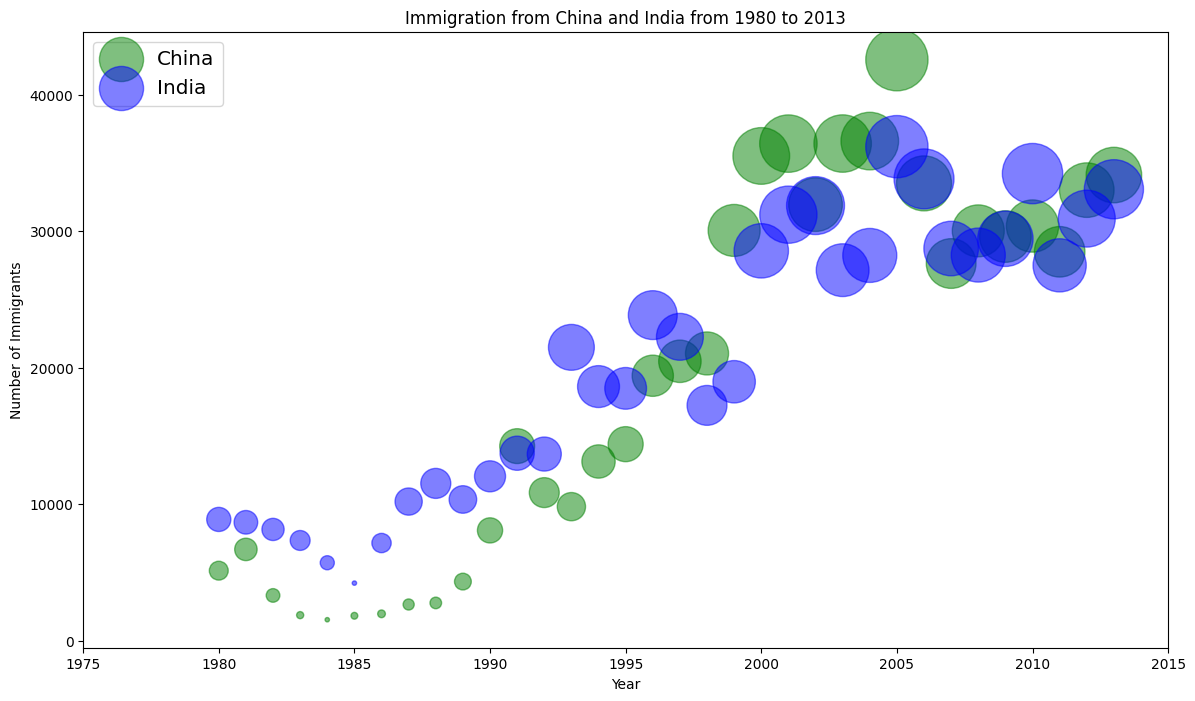

In [77]:
#### Bubble plots of immigration from China and India
# create the normalized weights
# normalize China data
norm_china = (df_can_t["China"] - df_can_t["China"].min()) / (
    df_can_t["China"].max() - df_can_t["China"].min()
)

# normalize India data
norm_india = (df_can_t["India"] - df_can_t["India"].min()) / (
    df_can_t["India"].max() - df_can_t["India"].min()
)


# plot the data
# China
ax0 = df_can_t.plot(
    kind="scatter",
    x="Year",
    y="China",
    figsize=(14, 8),
    alpha=0.5,  # transparency
    color="green",
    s=norm_china * 2000 + 10,  # pass in weights
    xlim=(1975, 2015),
)

# Argentina
ax1 = df_can_t.plot(
    kind="scatter",
    x="Year",
    y="India",
    alpha=0.5,
    color="blue",
    s=norm_india * 2000 + 10,
    ax=ax0,
)

ax0.set_ylabel("Number of Immigrants")
ax0.set_title("Immigration from China and India from 1980 to 2013")
ax0.legend(["China", "India"], loc="upper left", fontsize="x-large")